# **1. Data Exploration**

### Importing necessary libraries

In [1]:
import pandas as pd                   # For data manipulation and analysis
import numpy as np                    # For numerical operations
import seaborn as sns                 # For statistical data visualization
import matplotlib.pyplot as plt       # For creating static, animated, and interactive visualizations

### Loading 'Titanic_train' dataset for Data Exploration

In [2]:
titanic_train = pd.read_csv('/content/Titanic_train.csv')  # Read the CSV file into a DataFrame

In [3]:
titanic_train.head()  # Displays first five rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Overview

In [4]:
titanic_train.dtypes  # Displays the data types of each column

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [5]:
print("\nSummary Statistics:\n", titanic_train.describe(include='all'))  # Summary statistics for numerical and categorical features


Summary Statistics:
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parc

### Checking missing values

In [6]:
missing_values = titanic_train.isnull().sum()    # Count missing values for each column
missing_values    # Print the count of missing values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Visualizations

Text(0, 0.5, 'Frequency')

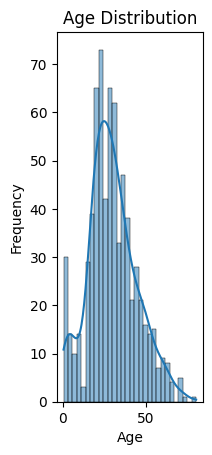

In [7]:
# Histogram of Age
plt.subplot(1, 3, 1)                                             # Create a subplot for the histogram
sns.histplot(titanic_train['Age'].dropna(), bins=30, kde=True)   # Plot histogram with Kernel Density Estimate
plt.title('Age Distribution')                                    # Title of the plot
plt.xlabel('Age')                                                # Label for the x-axis
plt.ylabel('Frequency')                                          # Label for the y-axis

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 0, 'Fare')

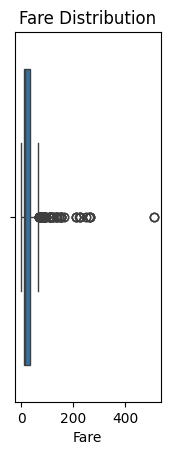

In [8]:
# Box plot for Fare
plt.subplot(1, 3, 2)                         # Create a subplot for the box plot
sns.boxplot(x='Fare', data=titanic_train)    # Box plot to show the distribution of Fare
plt.title('Fare Distribution')               # Title of the plot
plt.xlabel('Fare')                           # Label for the x-axis

Text(0.5, 1.02, 'Pair Plot of Numerical Features')

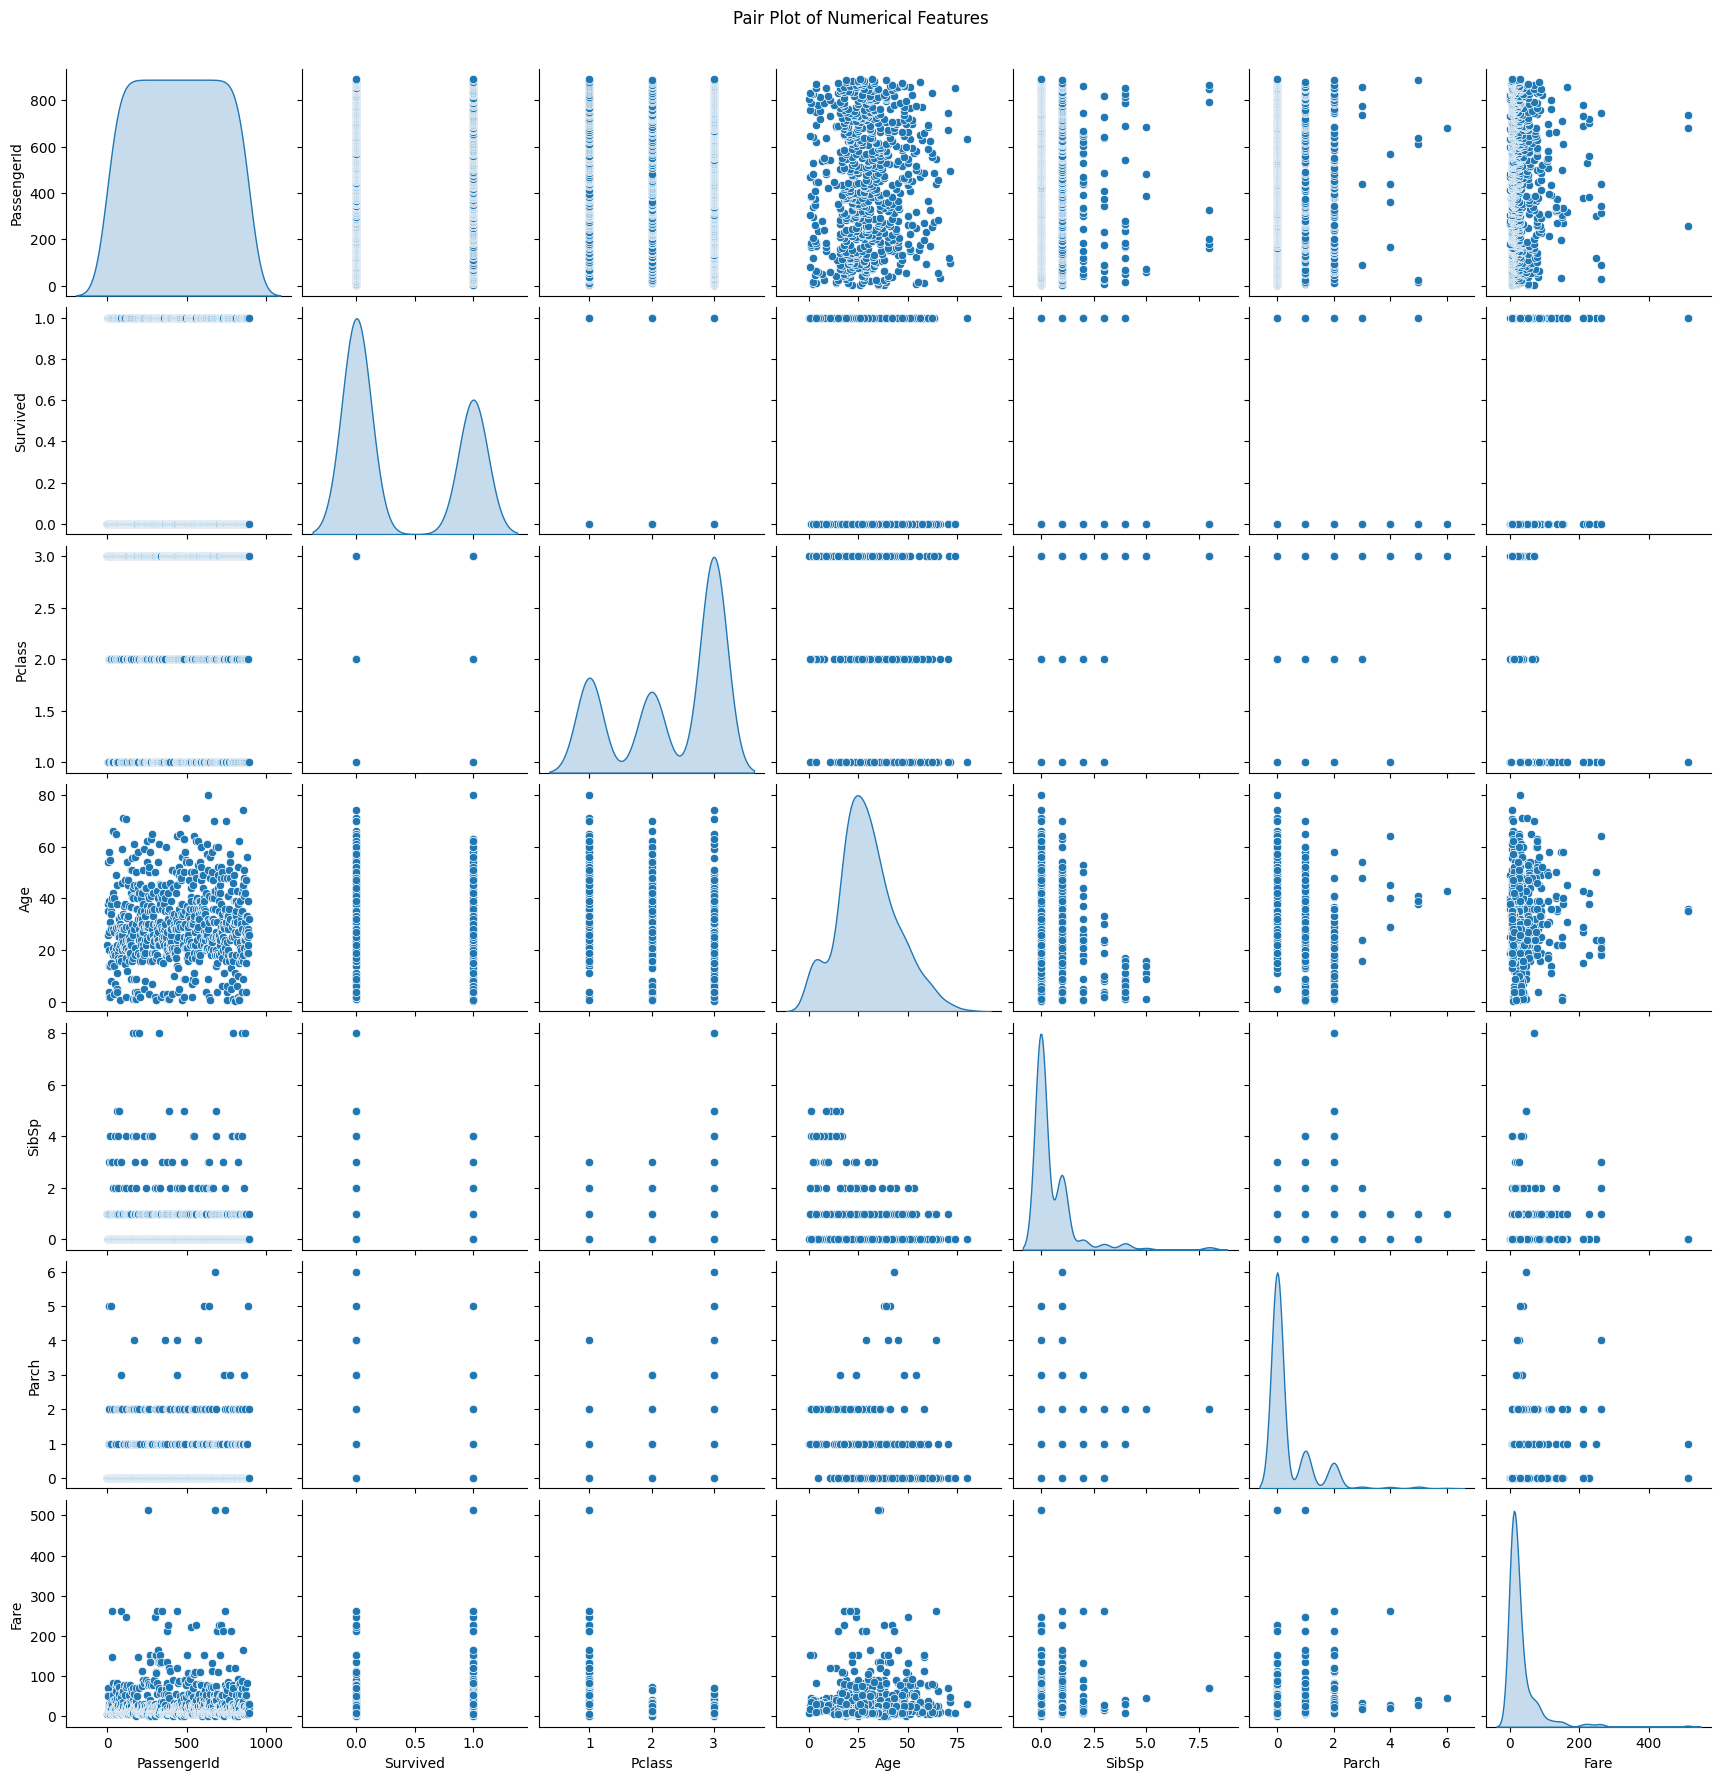

In [9]:
# Pair plot for numerical features
sns.pairplot(titanic_train, diag_kind='kde')              # Pair plot for all numerical features with KDE on the diagonal
plt.suptitle('Pair Plot of Numerical Features', y=1.02)   # Title for the pair plot

In [10]:
# This filter the DataFrame to include only numeric columns
numeric_columns = titanic_train.select_dtypes(include=[np.number])

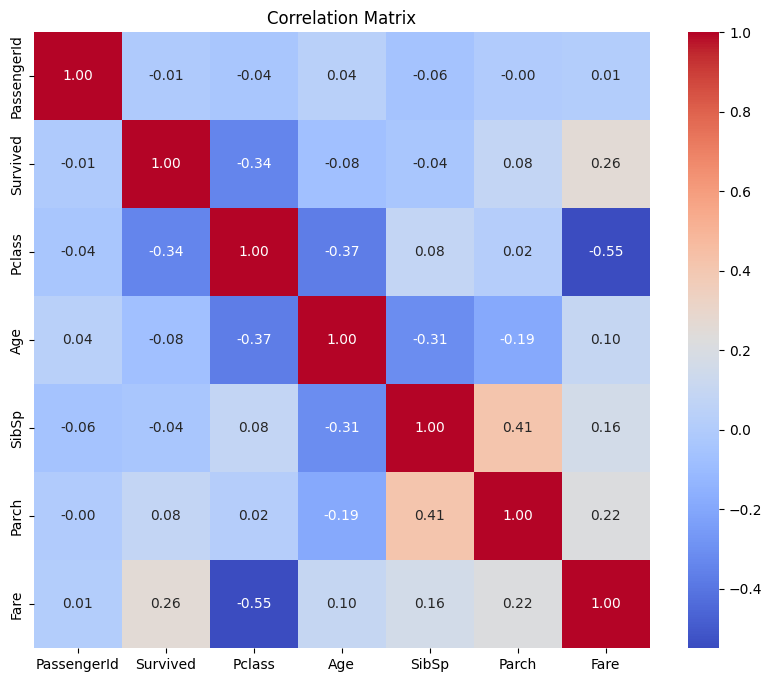

In [11]:
# Correlation Analysis
correlation_matrix = numeric_columns.corr()                                           # This calculates the correlation matrix
plt.figure(figsize=(10, 8))                                                           # Set the figure size for the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)  # Heatmap for correlations
plt.title('Correlation Matrix')                                                       # Title for the heatmap
plt.show()


# **Data Preprocessing**

Here we are using the Titanic_train.csv dataset to preprocess the data which includes handling missing values and encoding categorical variables

I'll be also using Titanic_test.csv to ensure that the test dataset is in the same format as the training dataset for model predictions

In [12]:
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # For encoding categorical variables

For Training Dataset

### Checking for missing values in dataset

In [13]:
missing_values = titanic_train.isnull().sum()        # Count missing values for each column
missing_values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Handling Missing Values

In [14]:
# Imputation for 'Age' using median (numerical feature)

imputer_age = SimpleImputer(strategy='median')                                  # Create an imputer for missing values, using median for numerical data
titanic_train['Age'] = imputer_age.fit_transform(titanic_train[['Age']])        # Apply imputer to the 'Age' column

In [15]:
# Imputation for 'Embarked' using the most frequent value (categorical feature)

imputer_embarked = SimpleImputer(strategy='most_frequent')                                        # Create an imputer for missing values, using most frequent for categorical data
titanic_train['Embarked'] = imputer_embarked.fit_transform(titanic_train[['Embarked']]).ravel()   # Apply imputer to the 'Embarked' column and flatten the result

In [16]:
# Imputation for 'Cabin' using the most frequent value (categorical feature)

imputer_embarked = SimpleImputer(strategy='most_frequent')                                        # Create an imputer for missing values, using most frequent for categorical data
titanic_train['Cabin'] = imputer_embarked.fit_transform(titanic_train[['Cabin']]).ravel()   # Apply imputer to the 'Cabin' column and flatten the result

In [17]:
# Check for missing values again to ensure they are handled
missing_values_after = titanic_train.isnull().sum()  # Count missing values for each column after imputation
missing_values_after

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### Encoding Categorical Variables

In [18]:
# Label encoding for 'Sex' column (binary categorical variable)

label_encoder = LabelEncoder()                                                # Create a LabelEncoder instance
titanic_train['Sex'] = label_encoder.fit_transform(titanic_train['Sex'])      # Encode 'Sex' (Male = 1, Female = 0)

In [19]:
# One-hot encoding for 'Embarked' column (categorical variable with more than two categories)

titanic_train = pd.get_dummies(titanic_train, columns=['Embarked'], drop_first=True)  # Create one-hot encoded columns for 'Embarked'

In [20]:
# Display the first few rows of the preprocessed data to verify the changes
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,False,True


In [21]:
# Check the data types and ensure categorical variables are encoded
print("\nData Types After Encoding:\n", titanic_train.dtypes)


Data Types After Encoding:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked_Q        bool
Embarked_S        bool
dtype: object


## Same Operations for Testing Dataset

In [22]:
titanic_test = pd.read_csv('/content/Titanic_test.csv')  # Read the CSV file into a DataFrame

### Checking for missing values in dataset

In [23]:
missing_values = titanic_test.isnull().sum()        # Count missing values for each column
missing_values

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


### Handling missing values

In [24]:
# Imputation for 'Age' using median (numerical feature)

imputer_age = SimpleImputer(strategy='median')                                  # Create an imputer for missing values, using median for numerical data
titanic_test['Age'] = imputer_age.fit_transform(titanic_test[['Age']])          # Apply imputer to the 'Age' column

In [25]:
# Imputation for 'Cabin' using the most frequent value (categorical feature)

imputer_embarked = SimpleImputer(strategy='most_frequent')                                        # Create an imputer for missing values, using most frequent for categorical data
titanic_test['Cabin'] = imputer_embarked.fit_transform(titanic_test[['Cabin']]).ravel()           # Apply imputer to the 'Cabin' column and flatten the result

In [26]:
# Imputation for 'Fare' using the most frequent value (categorical feature)

imputer_embarked = SimpleImputer(strategy='most_frequent')                                        # Create an imputer for missing values, using most frequent for categorical data
titanic_test['Fare'] = imputer_embarked.fit_transform(titanic_test[['Fare']]).ravel()             # Apply imputer to the 'Fare' column and flatten the result

In [27]:
# Check for missing values again to ensure they are handled
missing_values_after = titanic_test.isnull().sum()  # Count missing values for each column after imputation
missing_values_after

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


### Encoding Categorical Variables

In [28]:
# Label encoding for 'Sex' column (binary categorical variable)

label_encoder = LabelEncoder()                                                # Create a LabelEncoder instance
titanic_test['Sex'] = label_encoder.fit_transform(titanic_test['Sex'])        # Encode 'Sex' (Male = 1, Female = 0)

In [29]:
# One-hot encoding for 'Embarked' column (categorical variable with more than two categories)

titanic_test = pd.get_dummies(titanic_test, columns=['Embarked'], drop_first=True)  # Create one-hot encoded columns for 'Embarked'

In [30]:
# Display the first few rows of the preprocessed data to verify the changes
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,B57 B59 B63 B66,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,B57 B59 B63 B66,False,True
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,B57 B59 B63 B66,True,False
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,B57 B59 B63 B66,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,False,True


In [31]:
# Check the data types and ensure categorical variables are encoded
print("\nData Types After Encoding:\n", titanic_train.dtypes)


Data Types After Encoding:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked_Q        bool
Embarked_S        bool
dtype: object


# **Model Building**

### Importing all necessary libraries for Model Building

In [32]:
from sklearn.model_selection import train_test_split                                   # For splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression                                    # Logistic regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report    # Metrics for evaluation

### Building Logistic Regression Model

In [33]:
# Select features and target variable
# We'll use 'Pclass', 'Sex', 'Age', 'Fare', and 'Embarked' as features, and 'Survived' as the target variable

X = titanic_train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']]  # Feature matrix (independent variables)
y = titanic_train['Survived']  # Target variable (dependent variable)

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training and 20% testing

In [35]:
logreg = LogisticRegression()  # Creating logistic regression model

### Training the model

In [36]:
# Train the model on the training data
logreg.fit(X_train, y_train)  # Fit the model to the training data

LogisticRegression()

In [37]:
# Make predictions on the test data
y_pred = logreg.predict(X_test)  # Predict the target variable for the test data

In [38]:
# Evaluation of the model
accuracy = accuracy_score(y_test, y_pred)               # Calculate accuracy of the model
conf_matrix = confusion_matrix(y_test, y_pred)          # Compute the confusion matrix
class_report = classification_report(y_test, y_pred)    # Generate classification report

### Displaying all evaluation results

In [39]:
print(f"Accuracy: {accuracy * 100:.2f}%")             # Print the accuracy in percentage
print("\nConfusion Matrix:\n", conf_matrix)           # Print the confusion matrix
print("\nClassification Report:\n", class_report)     # Print the classification report

Accuracy: 79.89%

Confusion Matrix:
 [[88 17]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# **Model Evaluation**

### Importing all necessary libraries for Model Evaluation

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

Evaluating additional metrics

In [41]:
accuracy = accuracy_score(y_test, y_pred)                            # Calculate accuracy
precision = precision_score(y_test, y_pred)                          # Calculate precision
recall = recall_score(y_test, y_pred)                                # Calculate recall
f1 = f1_score(y_test, y_pred)                                        # Calculate F1-score
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])  # Calculate ROC-AUC score

Displaying calculated metrics

In [42]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"ROC-AUC score: {roc_auc:.2f}")

Accuracy: 79.89%
Precision: 76.39%
Recall: 74.32%
F1-score: 75.34%
ROC-AUC score: 0.88


Visualizaing the ROC curve

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])  # Get the false positive rate, true positive rate, and thresholds

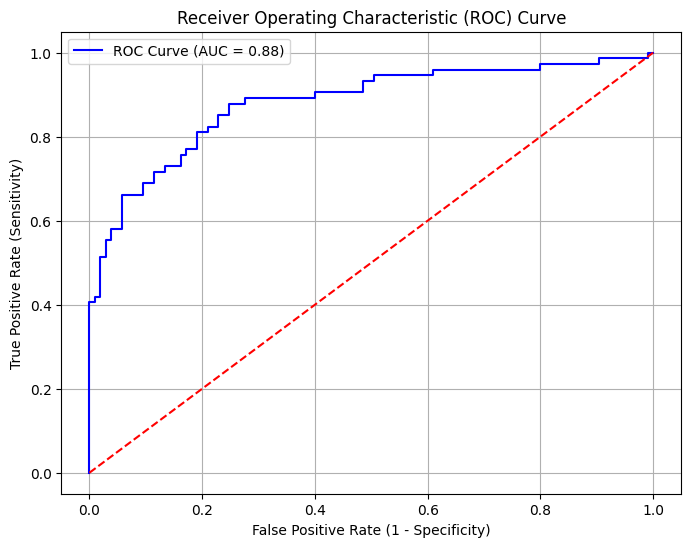

In [44]:
plt.figure(figsize=(8, 6))                                                  # Set the figure size
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Plot the ROC curve
plt.plot([0, 1], [0, 1], color='red', linestyle='--')                       # Plot a diagonal line representing random chance
plt.xlabel('False Positive Rate (1 - Specificity)')                         # Label the x-axis
plt.ylabel('True Positive Rate (Sensitivity)')                              # Label the y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve')                  # Title of the plot
plt.legend()                                                                # Show the legend
plt.grid()                                                                  # Add a grid to the plot
plt.show()                                                                  # Display the plot

# **Interpretation**

Interpreting coefficients of logistic regression model

In [45]:
coefficients = logreg.coef_[0]    # Coefficients of the features in the model
feature_names = X.columns         # Names of the features used in the model

Creating DataFrame to display coefficients alongside feature names

In [46]:
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

Displaying coefficients for each feature

In [47]:
# Display the coefficients for each feature
print("\nLogistic Regression Coefficients:\n")
print(coef_df)



Logistic Regression Coefficients:

      Feature  Coefficient
0      Pclass    -1.005942
1         Sex    -2.459285
2         Age    -0.024610
3        Fare     0.000362
4  Embarked_Q    -0.100021
5  Embarked_S    -0.513979


**Significance of feature in predicting target variable:** In predicting survival probability on the Titanic, several features play crucial roles. **Pclass (Passenger Class)** is a significant indicator, as passengers in higher classes (1st class) had better access to lifeboats and therefore a higher likelihood of survival; the coefficient for Pclass is typically negative, reflecting that as class number increases, survival chances decrease. **Sex** is another critical predictor, with females having a much higher survival rate due to social norms prioritizing women and children during evacuations; this feature usually has a strong positive coefficient. **Age** also contributes, often indicating that younger passengers had higher survival rates, aligning with historical patterns where children were prioritized for rescue. **Fare** reflects socioeconomic status, with higher-paying passengers generally having better access to safety measures, while **Embarked** location can hint at socioeconomic factors influencing survival odds. Overall, these features underscore the impact of social class and gender roles during the disaster, revealing the disparities in survival chances among different groups.

# **Deployment for Streamlit**

In [48]:
import joblib
# Save the model using joblib
joblib.dump(logreg, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [ ]:
from google.colab import files
# Download the model file
files.download('logistic_regression_model.pkl')

# **Interview Questions**

1. What is the difference between precision and recall?     
Precision and recall are two important metrics used to evaluate how well a classification model performs. Precision tells us how many of the positive predictions made by the model were actually correct.Recall, on the other hand, measures how many actual positive cases were correctly identified by the model. In simple terms, precision focuses on the accuracy of positive predictions, while recall focuses on capturing all the actual positive cases. Both are important for understanding how well a model works, especially when dealing with imbalanced classes.

2.What is cross-validation, and why is it important in binary classification?               
 Cross-validation is a method used to assess how well a model works by splitting the data into several parts, or "folds." The model is trained on some of these parts and tested on the others, and this process is repeated multiple times with different splits. This helps ensure that the model is evaluated fairly and can generalize well to new, unseen data. In binary classification, where there are two possible outcomes, cross-validation is important because it helps avoid overfitting, which occurs when a model performs well on training data but poorly on new data. By using cross-validation, we can be more confident that the model will perform reliably in real-world situations.